<a href="https://colab.research.google.com/github/kcanmersin/Google-Colab-Notebooks/blob/main/rain_tomorrow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
data = pd.read_csv("weatherAUS.csv")

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


In [41]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [42]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

data.drop('Date', axis=1, inplace=True)


In [43]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [44]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [46]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


In [47]:
data.nunique(dropna=False)

Location          49
MinTemp          390
MaxTemp          506
Rainfall         682
Evaporation      359
Sunshine         146
WindGustDir       17
WindGustSpeed     68
WindDir9am        17
WindDir3pm        17
WindSpeed9am      44
WindSpeed3pm      45
Humidity9am      102
Humidity3pm      102
Pressure9am      547
Pressure3pm      550
Cloud9am          11
Cloud3pm          11
Temp9am          442
Temp3pm          503
RainToday          3
RainTomorrow       3
year              11
month             12
day               31
dtype: int64

In [48]:
data = data.dropna(subset=['RainToday',"RainTomorrow"])

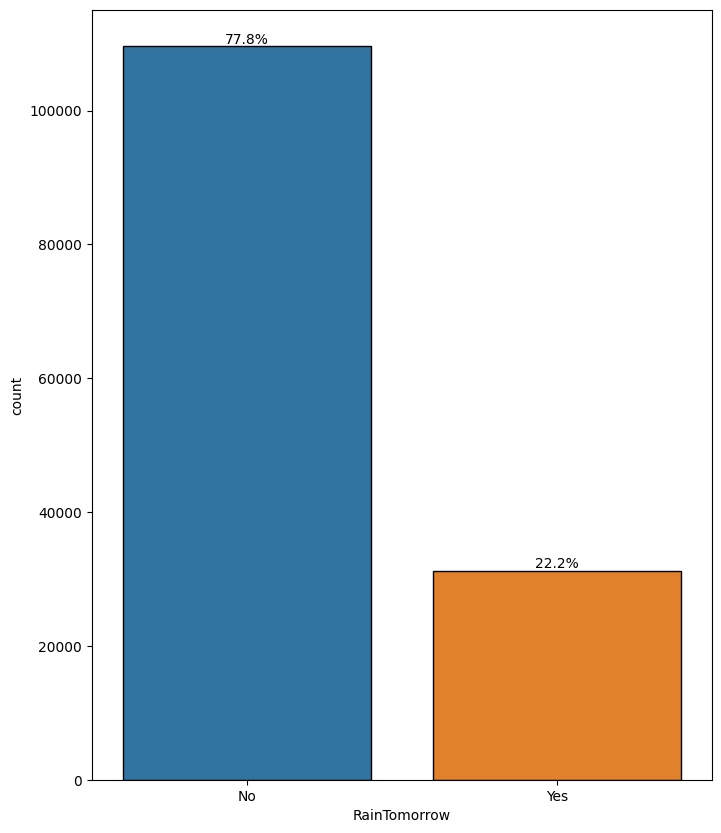

In [49]:

plt.figure(figsize=(8, 10))
ax = sns.countplot(data=data, x='RainTomorrow', edgecolor='black')

total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [50]:
cat_cols = data.select_dtypes(include=['category', 'object']).columns.tolist()
cat_cols

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [51]:
data[cat_cols].head()


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [52]:
data[cat_cols].isnull().sum()


Location           0
WindGustDir     9163
WindDir9am      9660
WindDir3pm      3670
RainToday          0
RainTomorrow       0
dtype: int64

In [53]:
for column_name in data.columns:
    if data[column_name].dtype == 'object':
        unique_values = data[column_name].unique()
        unique_values_str = ', '.join(map(str, unique_values))
        num_unique_values = data[column_name].nunique()
        print(f"Unique values in '{column_name}' ({num_unique_values}): {unique_values_str}")


Unique values in 'Location' (49): Albury, BadgerysCreek, Cobar, CoffsHarbour, Moree, Newcastle, NorahHead, NorfolkIsland, Penrith, Richmond, Sydney, SydneyAirport, WaggaWagga, Williamtown, Wollongong, Canberra, Tuggeranong, MountGinini, Ballarat, Bendigo, Sale, MelbourneAirport, Melbourne, Mildura, Nhil, Portland, Watsonia, Dartmoor, Brisbane, Cairns, GoldCoast, Townsville, Adelaide, MountGambier, Nuriootpa, Woomera, Albany, Witchcliffe, PearceRAAF, PerthAirport, Perth, SalmonGums, Walpole, Hobart, Launceston, AliceSprings, Darwin, Katherine, Uluru
Unique values in 'WindGustDir' (16): W, WNW, WSW, NE, NNW, N, NNE, SW, ENE, SSE, S, NW, SE, ESE, nan, E, SSW
Unique values in 'WindDir9am' (16): W, NNW, SE, ENE, SW, SSE, S, NE, SSW, N, WSW, ESE, E, nan, NW, WNW, NNE
Unique values in 'WindDir3pm' (16): WNW, WSW, E, NW, W, SSE, ESE, ENE, NNW, SSW, SW, SE, N, S, NNE, nan, NE
Unique values in 'RainToday' (2): No, Yes
Unique values in 'RainTomorrow' (2): No, Yes


In [54]:
num_cols = data.select_dtypes(include=['number']).columns.tolist()
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'month',
 'day']

In [55]:
data[num_cols].isnull().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
year                 0
month                0
day                  0
dtype: int64

In [56]:
outlier_cols = {}
for column_name in num_cols:
    IQR = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
    Upper_fence = data[column_name].quantile(0.75) + (IQR * 3)
    Lower_fence = data[column_name].quantile(0.25) - (IQR * 3)

    outliers = data[(data[column_name] > Upper_fence) | (data[column_name] < Lower_fence)]
    if not outliers.empty:
        outlier_cols[column_name] = {
            'min_fence': Lower_fence,
            'upper_fence': Upper_fence
        }
        print(f"{column_name} outliers are values < {Lower_fence:.4f} or > {Upper_fence:.4f}")


Rainfall outliers are values < -2.4000 or > 3.2000
Evaporation outliers are values < -11.8000 or > 21.8000
WindGustSpeed outliers are values < -20.0000 or > 99.0000
WindSpeed9am outliers are values < -29.0000 or > 55.0000
WindSpeed3pm outliers are values < -20.0000 or > 57.0000
Pressure9am outliers are values < 984.8000 or > 1050.6000
Pressure3pm outliers are values < 981.6000 or > 1048.8000


In [57]:
outlier_cols

{'Rainfall': {'min_fence': -2.4000000000000004, 'upper_fence': 3.2},
 'Evaporation': {'min_fence': -11.800000000000002,
  'upper_fence': 21.800000000000004},
 'WindGustSpeed': {'min_fence': -20.0, 'upper_fence': 99.0},
 'WindSpeed9am': {'min_fence': -29.0, 'upper_fence': 55.0},
 'WindSpeed3pm': {'min_fence': -20.0, 'upper_fence': 57.0},
 'Pressure9am': {'min_fence': 984.8000000000001, 'upper_fence': 1050.6},
 'Pressure3pm': {'min_fence': 981.5999999999999,
  'upper_fence': 1048.8000000000002}}

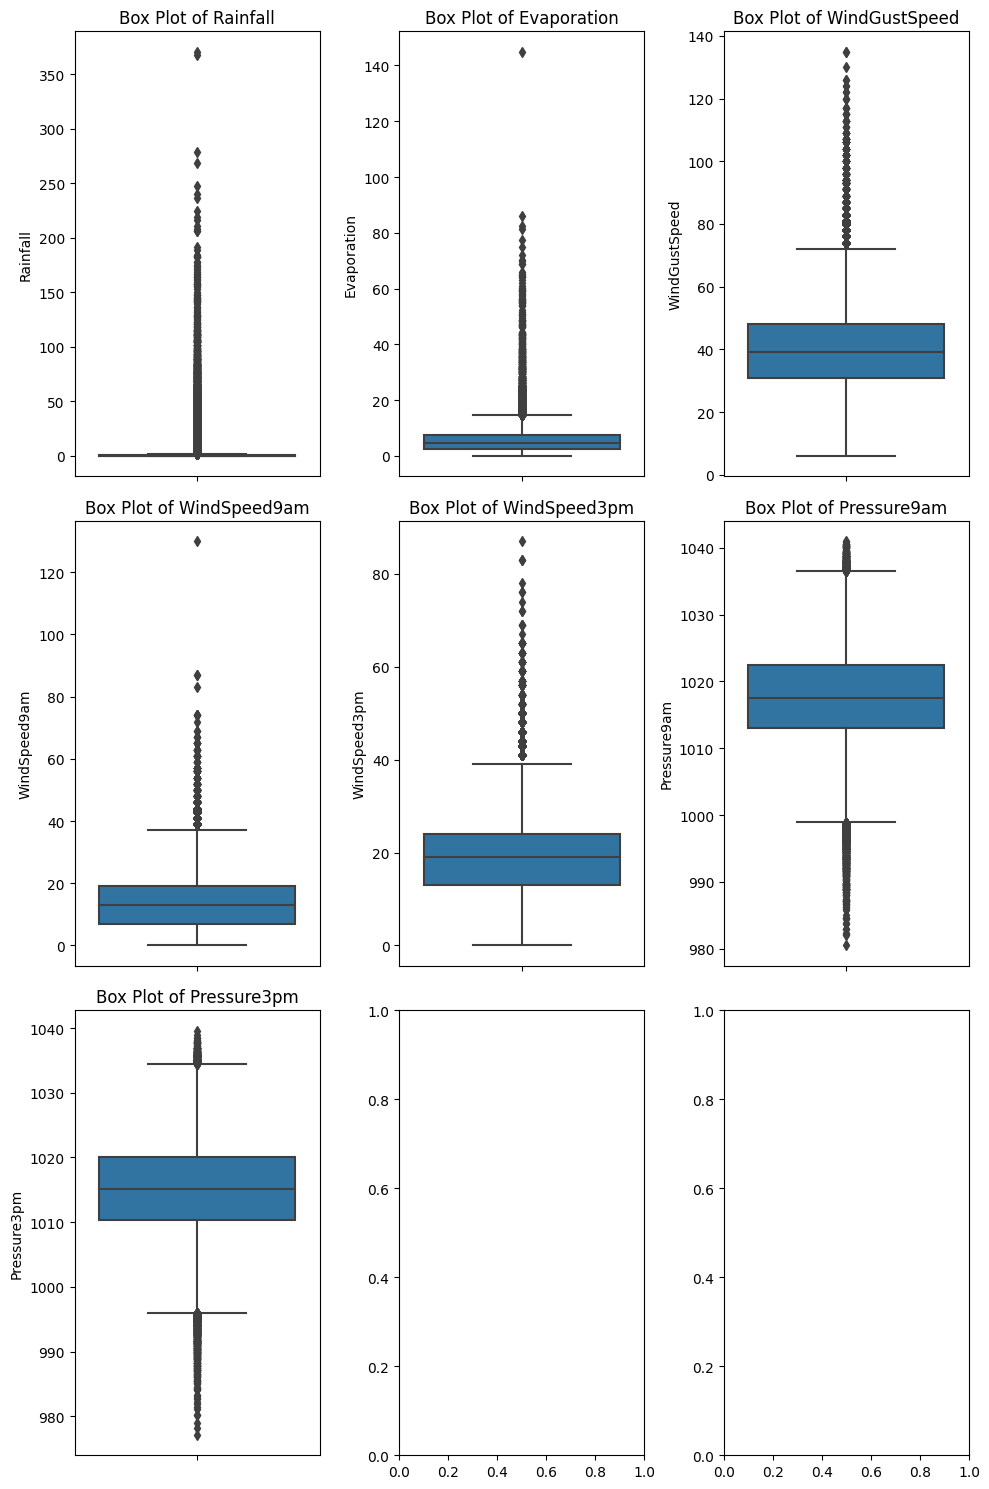

In [58]:
import matplotlib.pyplot as plt

num_plots = len(outlier_cols)
num_columns = 3

num_rows = (num_plots + num_columns - 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 5 * num_rows))

for i, column_name in enumerate(outlier_cols):
    row = i // num_columns
    col = i % num_columns
    sns.boxplot(data=data, y=column_name, ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column_name}')

plt.tight_layout()
plt.show()


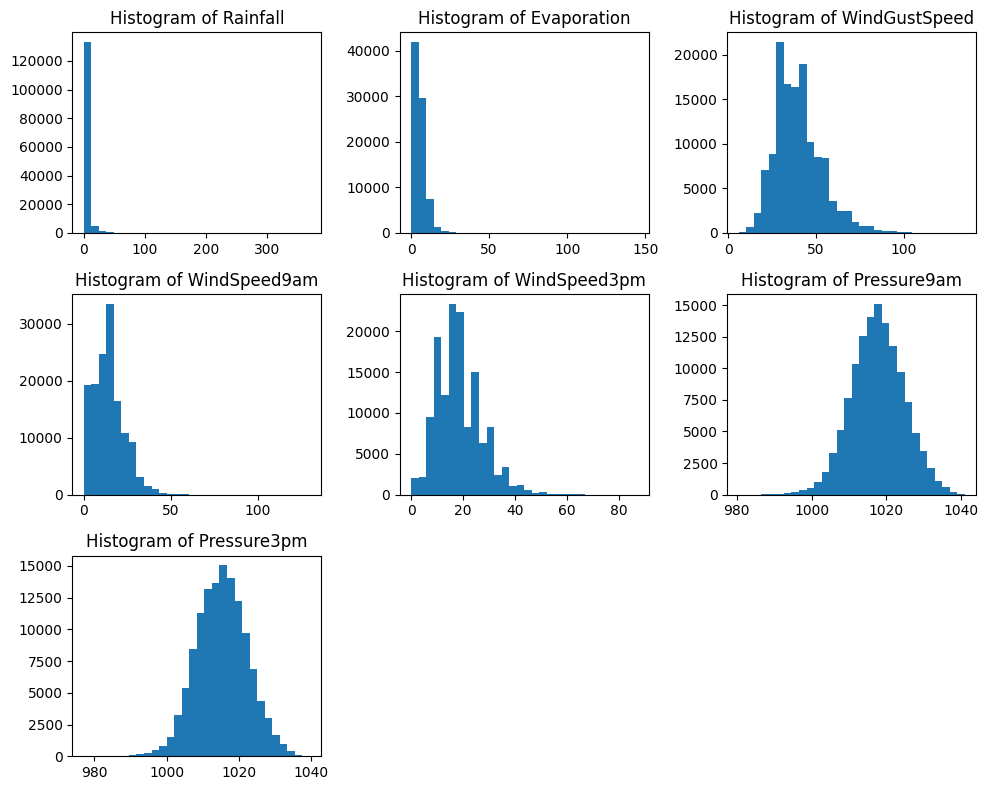

In [59]:
plt.figure(figsize=(10, 8))
for i, column_name in enumerate(outlier_cols):
    row = i // num_columns
    col = i % num_columns

    plt.subplot(3, 3, i+1)
    plt.hist(data[column_name], bins=30)
    plt.title(f'Histogram of {column_name}')

plt.tight_layout()
plt.show()

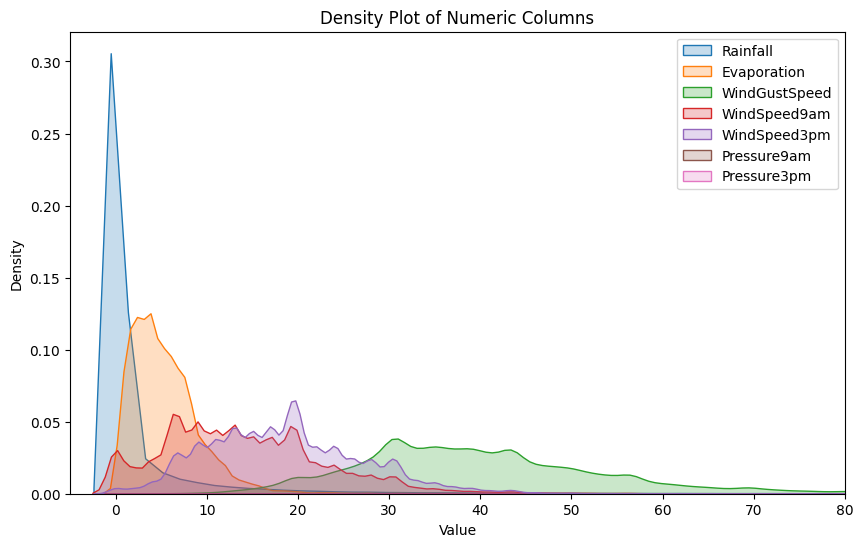

In [60]:
plt.figure(figsize=(10, 6))
for column_name in outlier_cols:
    sns.kdeplot(data[column_name], label=column_name, fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Numeric Columns')
plt.legend()
plt.xlim(-5, 80)
plt.show()


<ipython-input-61-5cb030240d67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


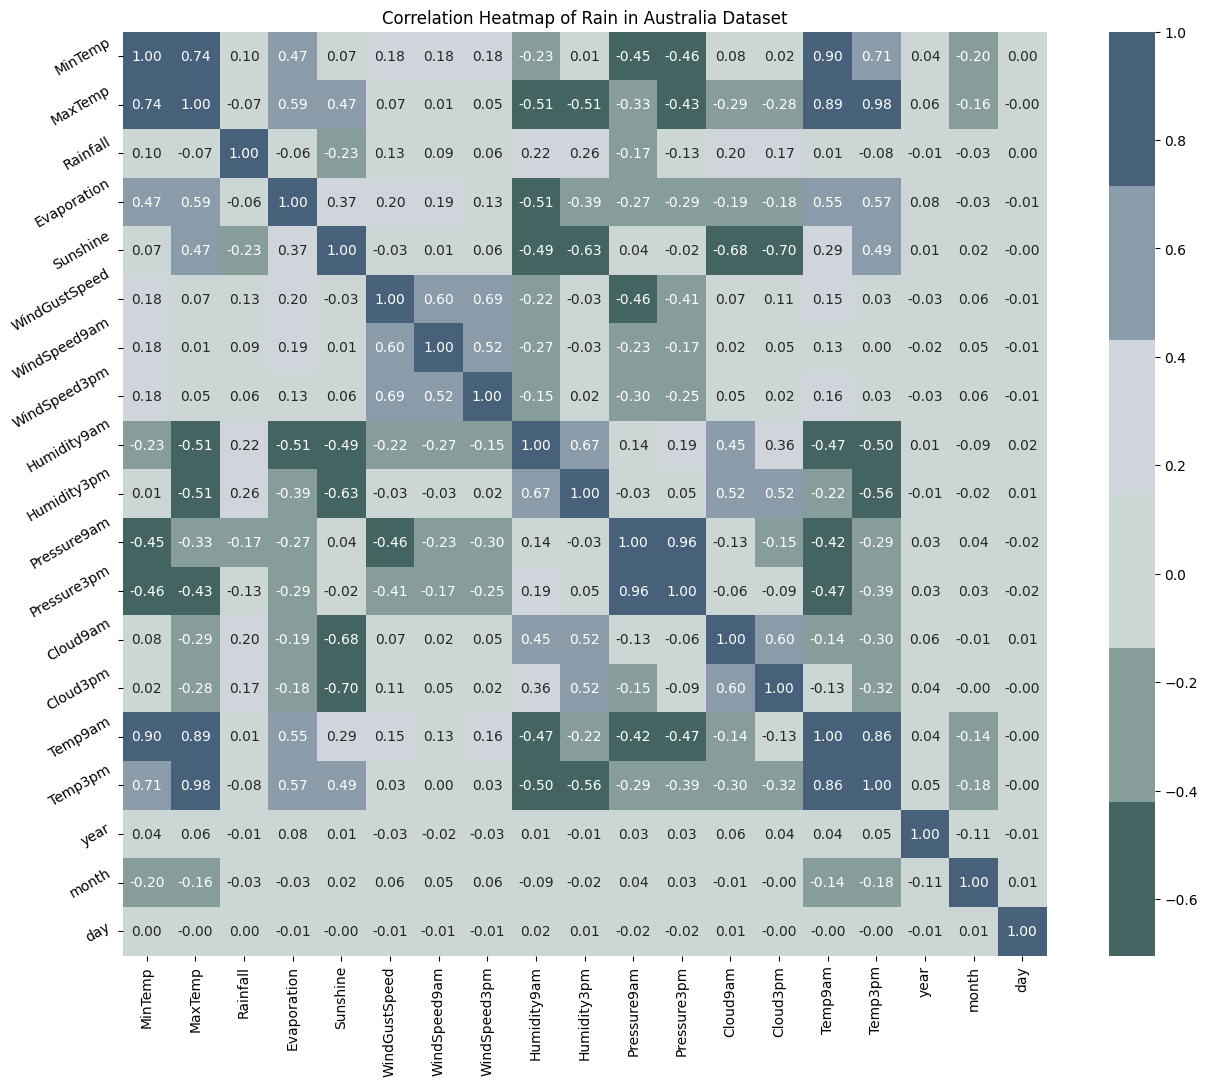

In [61]:

corrmat = data.corr()

cmap = sns.diverging_palette(180, 240, s=50, l=40, n=6)

plt.figure(figsize=(16, 12))
ax = sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', linecolor='white', cmap=cmap)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap of Rain in Australia Dataset')
plt.show()


In [62]:
def fix_outliers(df, outliers_dict, upper=True, lower=True):
    for column_name, limits in outliers_dict.items():
        if upper:
            upper_fence = limits['upper_fence']
            df[column_name] = np.where(df[column_name] > upper_fence, upper_fence, df[column_name])
        if lower:
            lower_fence = limits['min_fence']
            df[column_name] = np.where(df[column_name] < lower_fence, lower_fence, df[column_name])
    return df



In [63]:
data = fix_outliers(data, outlier_cols, upper=True, lower=False)


In [64]:
data.Rainfall.max(), data.Rainfall.max()

(3.2, 3.2)

In [65]:
from scipy.stats import skew

def find_columns_for_log_transform(data, threshold=0.5):
    log_cols = []

    for column_name in data.columns:
        if data[column_name].dtype != 'object':
            skewness = skew(data[column_name])

            if abs(skewness) > threshold:
                log_cols.append(column_name)

            print(f"Skewness of '{column_name}': {skewness}")

    return log_cols

log_cols = find_columns_for_log_transform(data)
print("Columns for Log Transform:", log_cols)

Skewness of 'MinTemp': nan
Skewness of 'MaxTemp': nan
Skewness of 'Rainfall': 1.4497988798777985
Skewness of 'Evaporation': nan
Skewness of 'Sunshine': nan
Skewness of 'WindGustSpeed': nan
Skewness of 'WindSpeed9am': nan
Skewness of 'WindSpeed3pm': nan
Skewness of 'Humidity9am': nan
Skewness of 'Humidity3pm': nan
Skewness of 'Pressure9am': nan
Skewness of 'Pressure3pm': nan
Skewness of 'Cloud9am': nan
Skewness of 'Cloud3pm': nan
Skewness of 'Temp9am': nan
Skewness of 'Temp3pm': nan
Skewness of 'year': -0.04275304466339444
Skewness of 'month': 0.028518221256069058
Skewness of 'day': 0.008714938067633985
Columns for Log Transform: ['Rainfall']


In [66]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder())




num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("cat", cat_pipeline, cat_cols),
    ("num", num_pipeline, num_cols)
])

In [67]:
X = data.drop(["RainTomorrow"], axis=1)
y = data["RainTomorrow"]

cat_cols.remove("RainTomorrow")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed=preprocessing.transform(X_test)

In [68]:
X_train_preprocessed

<105590x118 sparse matrix of type '<class 'numpy.float64'>'
	with 2534160 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [70]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    seed=42
)

xgb_classifier.fit(X_train_preprocessed, y_train_encoded)

y_pred_encoded = xgb_classifier.predict(X_test_preprocessed)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8561


In [71]:
from sklearn.metrics import confusion_matrix

y_pred_encoded = xgb_classifier.predict(X_test_preprocessed)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])


Confusion matrix

 [[26088  1314]
 [ 3750  4045]]

True Positives(TP) =  26088

True Negatives(TN) =  4045

False Positives(FP) =  1314

False Negatives(FN) =  3750


<Axes: >

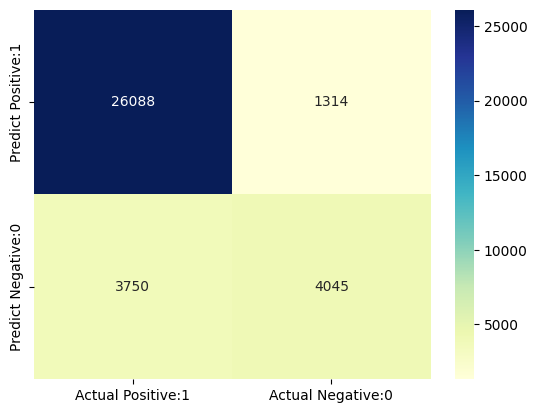

In [72]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')